In [30]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [31]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [32]:
X_train = X_train.reshape(-1, 28*28)/255
X_test = X_test.reshape(-1, 28*28)/255

In [33]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

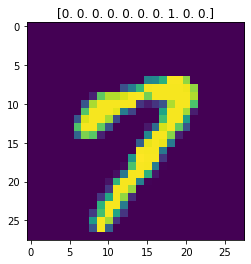

In [34]:
sample_idx = 15
data = X_train[sample_idx].reshape(28, 28)
out = y_train[sample_idx]
import matplotlib.pyplot as plt
plt.imshow(data)
plt.title(str(out))

In [37]:
class ANN:
    def __init__(self, input_layer = 784, hidden_layer = 64, output_layer = 10, lr = 0.01):
        self.input_layer = input_layer
        self.hidden_layer = hidden_layer
        self.output_layer = output_layer
        self.lr = lr

        self.W1 = np.random.randn(self.input_layer, self.hidden_layer) * 0.01
        self.W2 = np.random.randn(self.hidden_layer, self.output_layer) * 0.01
        self.b1 = np.zeros((1, hidden_layer))
        self.b2 = np.zeros((1, output_layer))

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def softmax(self, z):
        e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return e_z/np.sum(e_z, axis=1, keepdims=True)
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, X, y, output):
        m = X.shape[0]

        error = output-y
        dW2 = np.dot(self.a1.T, error) / m
        db2 = np.sum(error, axis=0, keepdims = True) / m

        error = np.dot(error, self.W2.T) * self.a1 * (1-self.a1)
        dW1 = np.dot(X.T, error) / m
        db1 = np.sum(error, axis=0, keepdims=True)/m
        
        self.W1 -= self.lr * dW1
        self.W2 -= self.lr * dW2
        self.b1 -= self.lr * db1
        self.b2 -= self.lr * db2

    def train(self, X, y, epochs=100, batch=64):
        for eposh in range(epochs):
            for i in range(0, X.shape[0], batch):
                X_batch = X[i: i+batch]
                y_batch = y[i: i+batch]

                output = self.forward(X_batch)
                self.backward(X_batch, y_batch, output)

            pred = self.predict(X)
            acc = np.mean(np.argmax(pred, axis=1) == np.argmax(y, axis=1))
            print(acc)

    def predict(self, X):
        return self.forward(X)

In [38]:
model = ANN()
model.train(X_train,y_train,epochs = 20)

y_pred = model.predict(X_test)
accuracy = np.mean(np.argmax(y_pred,axis = 1) == np.argmax(y_test,axis = 1))
print(f"Test accuracy : {accuracy:.4f}")



0.20973333333333333
0.39313333333333333
0.5292833333333333
0.6472333333333333
0.73315
0.7857333333333333
0.8166333333333333
0.8360666666666666
0.8486666666666667
0.85985
0.8684
0.8757333333333334
0.8813166666666666
0.8859833333333333
0.8899166666666667
0.8926333333333333
0.89495
0.8972833333333333
0.8993333333333333
0.90095
Test accuracy : 0.9031
